In [2]:
import pandas as pd

df = pd.read_csv("msamd_14454.csv")
df.head()

/var/folders/pl/0qrs2c_56bd6q9jwb600j60h0000gn/T/ipykernel_16573/4104424442.py:3: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("msamd_14454.csv")


,activity_year,lei,derived_msa-md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason-2,denial_reason-3,denial_reason-4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4448,31.27,113700,91,1016,1519,72
1,2021,549300DAUXQ2DCY4H838,14454,MA,25021.0,2.502140e+10,NC,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,4230,7.78,113700,179,1228,1394,60
2,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502350e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,7312,2.95,113700,132,2099,2345,43
3,2021,549300DAUXQ2DCY4H838,14454,MA,25023.0,2.502351e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,2380,77.98,113700,18,16,343,51
4,2021,549300DAUXQ2DCY4H838,14454,MA,25025.0,2.502513e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Ethnicity Not Available,...,NaN,NaN,NaN,5399,69.98,113700,54,568,1437,48


By county determine how many loans were taken.

A loan being taken has a value of 1 in the 'action_taken' column

<AxesSubplot:xlabel='county_code'>

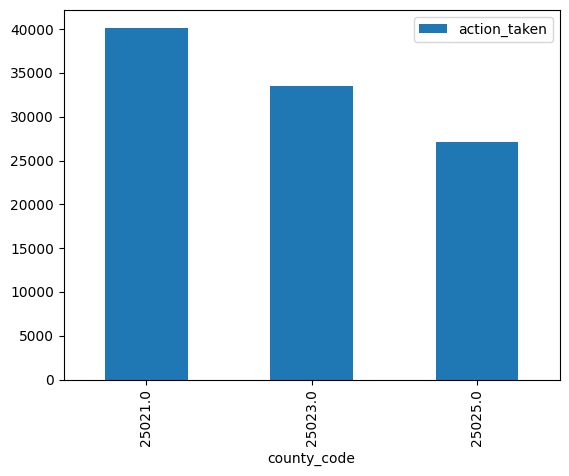

In [27]:
df3 = df[['county_code', 'action_taken']]
df3['action_taken'].map({1: 1, 2: 0}).fillna(0)
df3 = df3.query('action_taken == 1')
df3.groupby('county_code').count().plot(kind='bar')

In [28]:
county_codes_dict = {25021: 'Norfolk', 25023: 'Plymouth', 25025: 'Suffolk'}
per_county_count = df3['county_code'].value_counts()

for county_code in county_codes_dict.keys():
    print(f"{county_codes_dict[county_code]}: {per_county_count[county_code]}")

Norfolk: 40175
Plymouth: 33453
Suffolk: 27140
